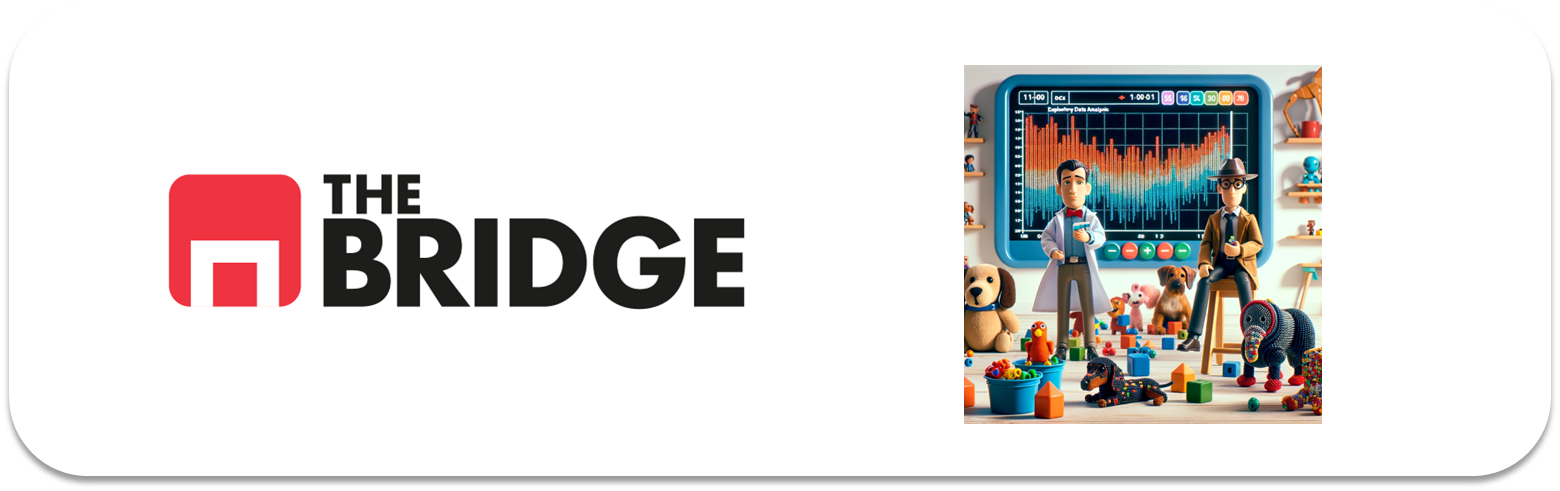

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from bootcampviztools import *

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv('./data/titanic.csv')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic.drop(columns=['deck','survived','pclass','embarked'], inplace = True)
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [4]:
df_titanic['family_members'] = df_titanic.parch + df_titanic.sibsp
df_titanic.drop(columns = ['parch','sibsp'], inplace=True)
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [5]:
df_titanic.loc[df_titanic.embark_town.isna() == True, 'embark_town'] = df_titanic.embark_town.mode()[0]
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [6]:
for gender in df_titanic.who.unique():
    edad = df_titanic.loc[df_titanic.who == gender, 'age'].mean()
    df_titanic.loc[(df_titanic.who == gender) & (df_titanic.age.isna() == True), 'age'] = edad
    print(gender, edad)

man 33.17312348668281
woman 32.0
child 6.369518072289156


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [8]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

*Sobrevivieron más mujeres (200) que hombres (88) y niños (49).*

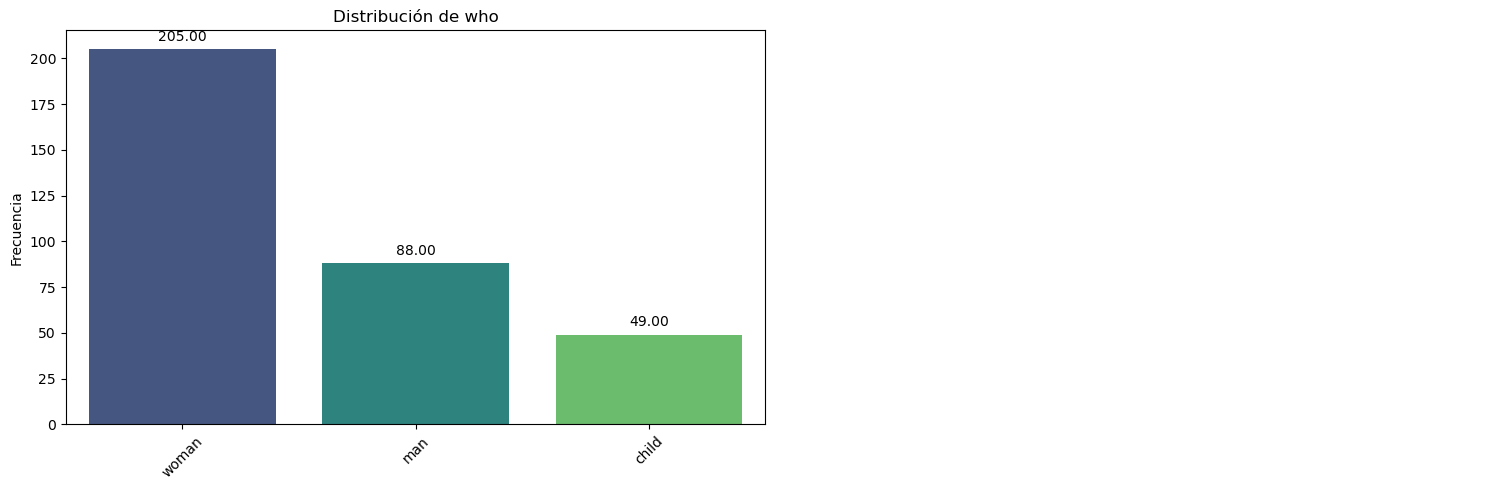

In [9]:
pinta_distribucion_categoricas(df_titanic[df_titanic.alive == 'yes'], ['who'], mostrar_valores=True)

*En términos relativos sobrevivieron más mujeres (76%) que niños (59%). De los hombres tan sólo sobrevivió un 16%.*  
*Los niños eran minoría, por lo que el género aporta poco a la gran diferencia porcentual entre hombres y mujeres,*  
*sobreviviendo un 74% de mujeres y niñas frente a un 19% de hombres y niños,*  
*por tanto, sí, existe una gran relación entre el sexo y la supervivencia en el Titanic.* 

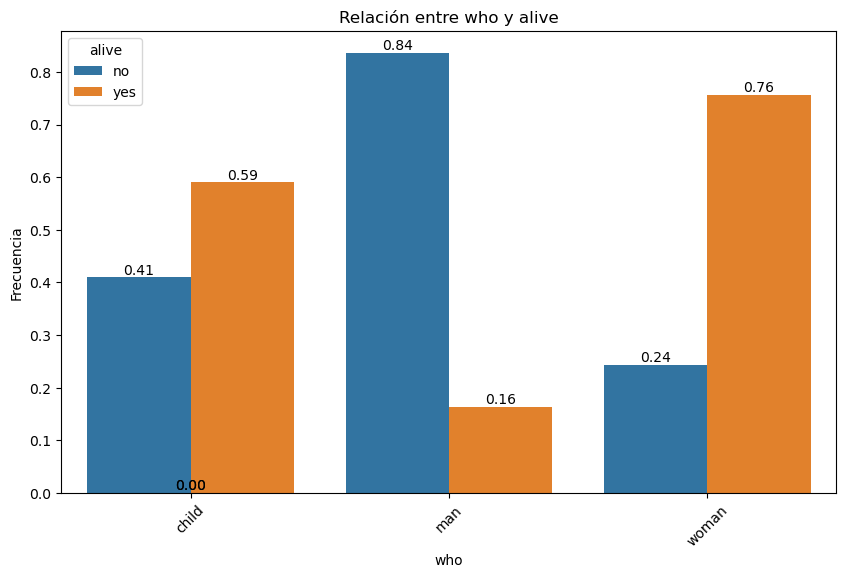

In [10]:
plot_categorical_relationship_fin(df_titanic, 'who', 'alive', relative_freq=True, show_values=True, size_group = 5)

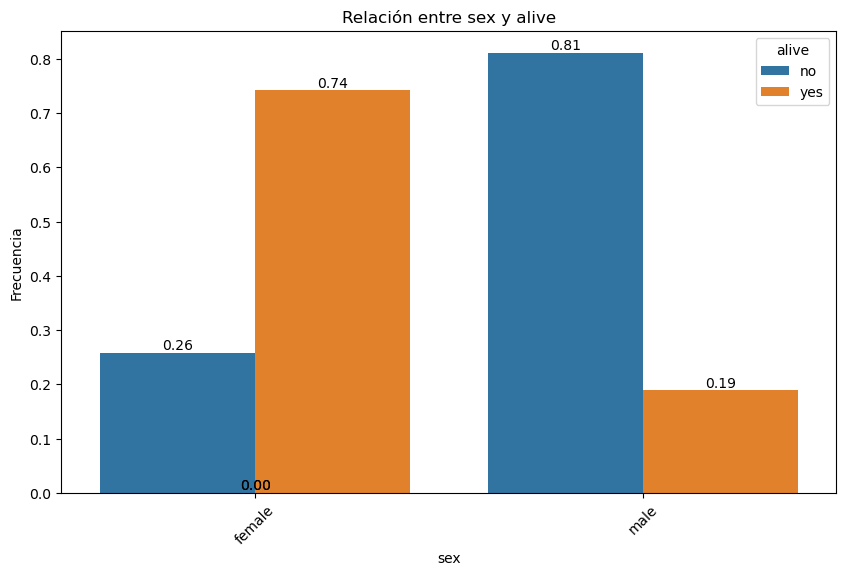

In [11]:
plot_categorical_relationship_fin(df_titanic, 'sex', 'alive', relative_freq=True, show_values=True, size_group = 5)

*Respecto a la edad adulta (16 años inclusive), también existe una relación con la supervivencia,*  
*sobreviviendo el 59% de los niños frente al 36% de adultos (mujeres y hombres).*

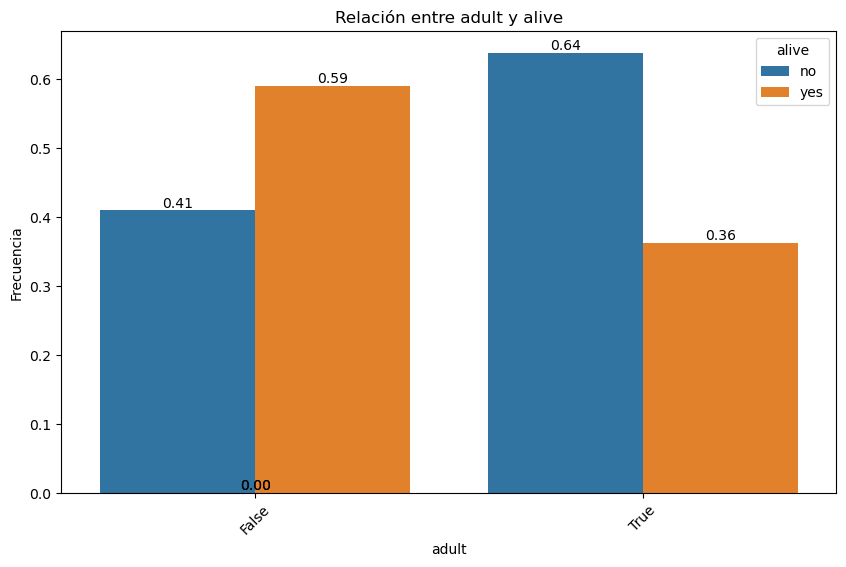

In [12]:
df_titanic['adult'] = True
df_titanic.loc[df_titanic.age < df_titanic.loc[df_titanic.adult_male, 'age'].min(), 'adult'] = False

plot_categorical_relationship_fin(df_titanic, 'adult', 'alive', relative_freq=True, show_values=True, size_group = 5)

*Relaciones estadísticas:*

In [27]:
def relacion_chi2(df, var1, var2):
    tabla_contingencia = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

    print("Valor Chi-Cuadrado:", chi2)
    print("P-Value:", p)
    #print("Grados de Libertad:", dof)
    #print("Tabla de Frecuencias Esperadas:\n", expected)
    print('------------------------------------------------')

    if p < 0.05:
        print(f'Existe relación estadística entre {var1} y {var2}.')
    else:
        print(f'No existe relación estadística entre {var1} y {var2}.')

relacion_chi2(df_titanic, 'sex','alive')
print('\n')
relacion_chi2(df_titanic, 'adult','alive')

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
------------------------------------------------
Existe relación estadística entre sex y alive.


Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
------------------------------------------------
Existe relación estadística entre adult y alive.


2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

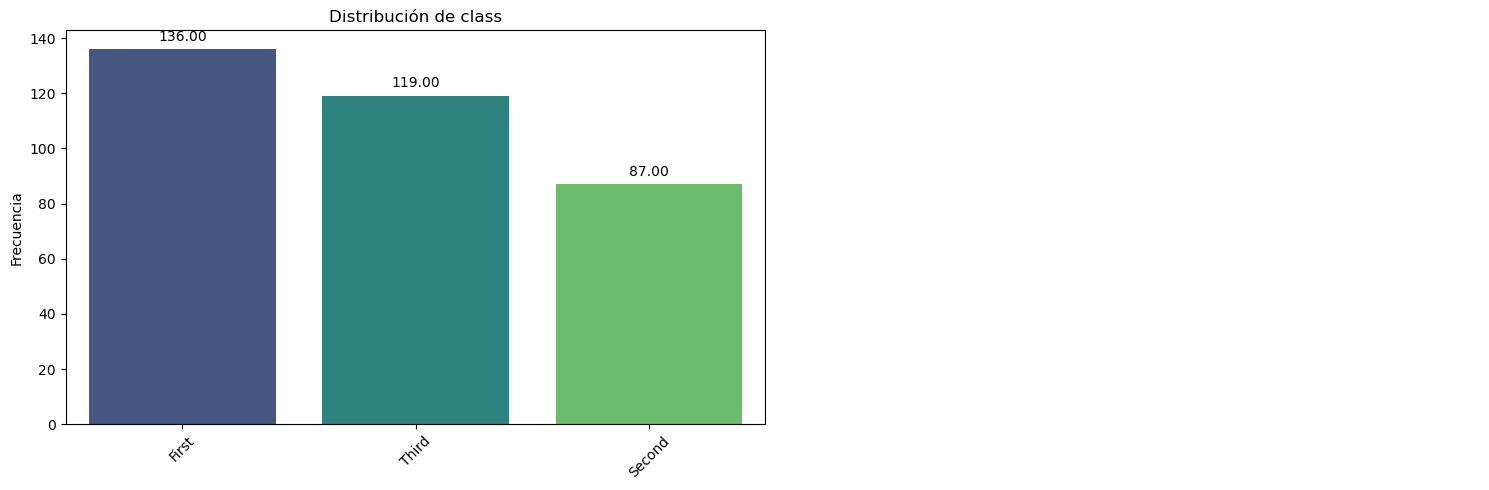

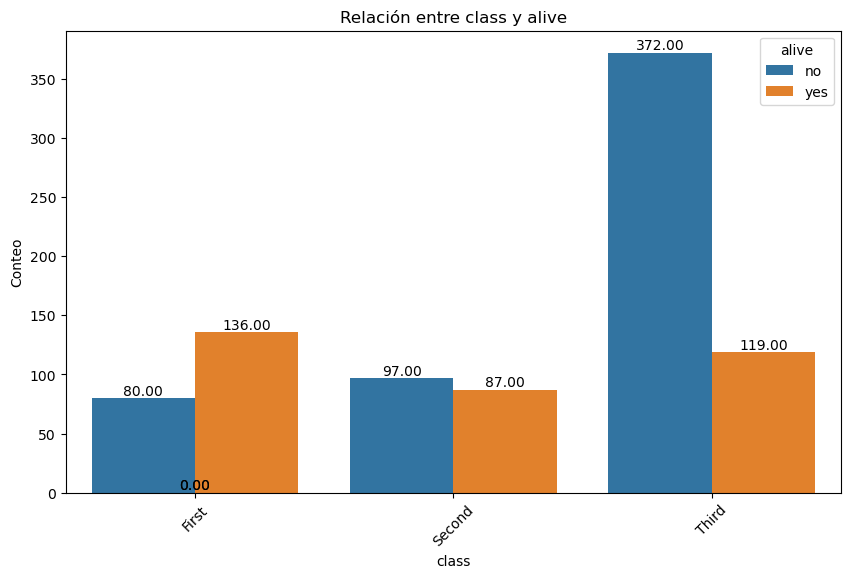

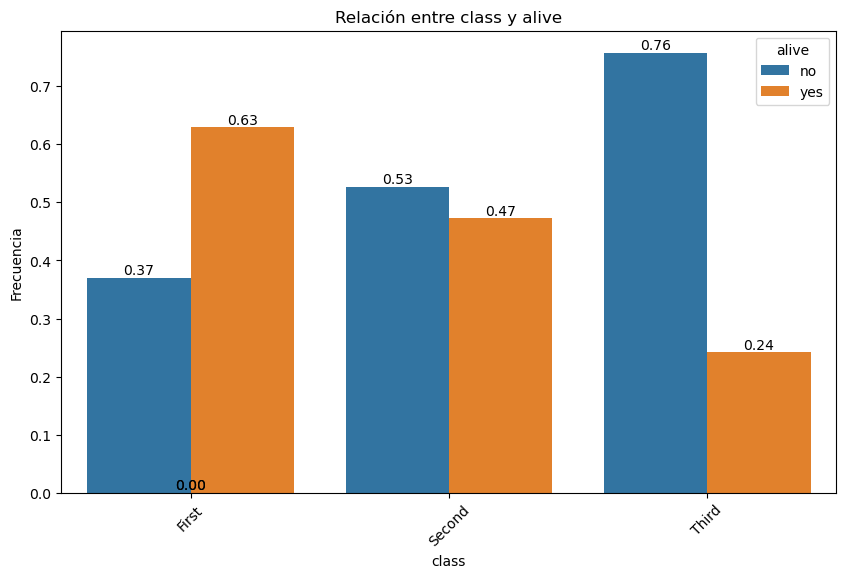

In [31]:
pinta_distribucion_categoricas(df_titanic[df_titanic.alive == 'yes'], ['class'], mostrar_valores=True)
plot_categorical_relationship_fin(df_titanic, 'class', 'alive', relative_freq=False, show_values=True)
plot_categorical_relationship_fin(df_titanic, 'class', 'alive', relative_freq=True, show_values=True)

*En términos absolutos sobrevivieron más pasajeros de primera clase, aunque todas en un rango similar: 136,000 seguido de 119,000 pasajeros de tercera clase.*  
*Sin embargo, en términos relativos se observa la gran diferencia, en dónde sobrevivieron un 63% de pasajeros de primera clase frente a un 24% de tercera clase.*

*Relación estadistica:*

In [28]:
relacion_chi2(df_titanic,'class','alive')

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
------------------------------------------------
Existe relación estadística entre class y alive.


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

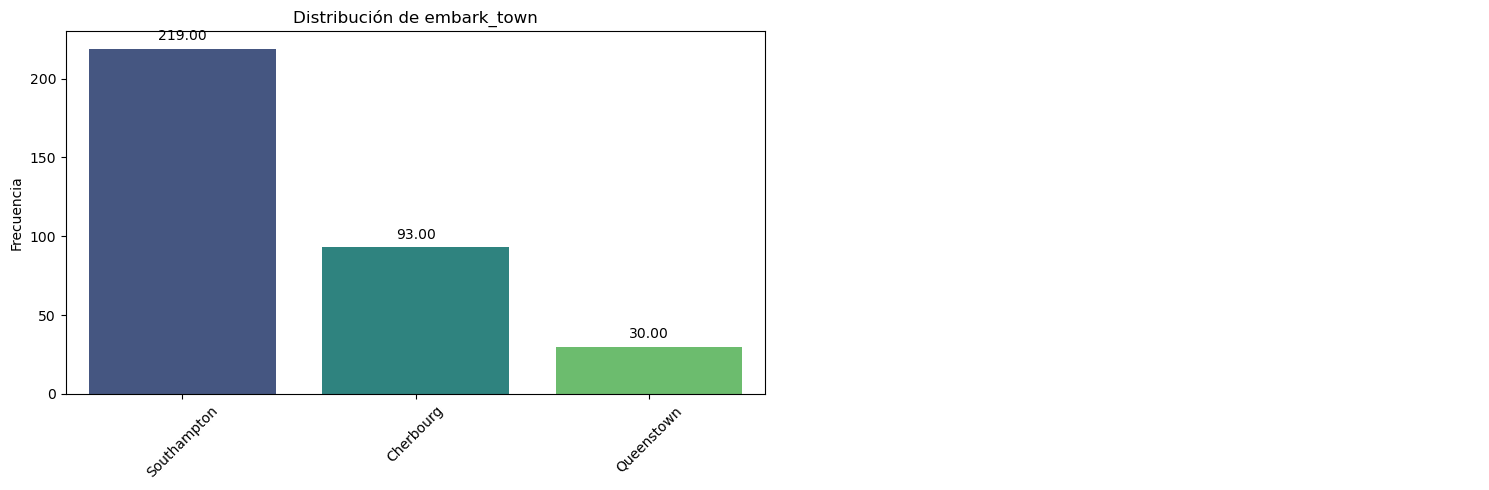

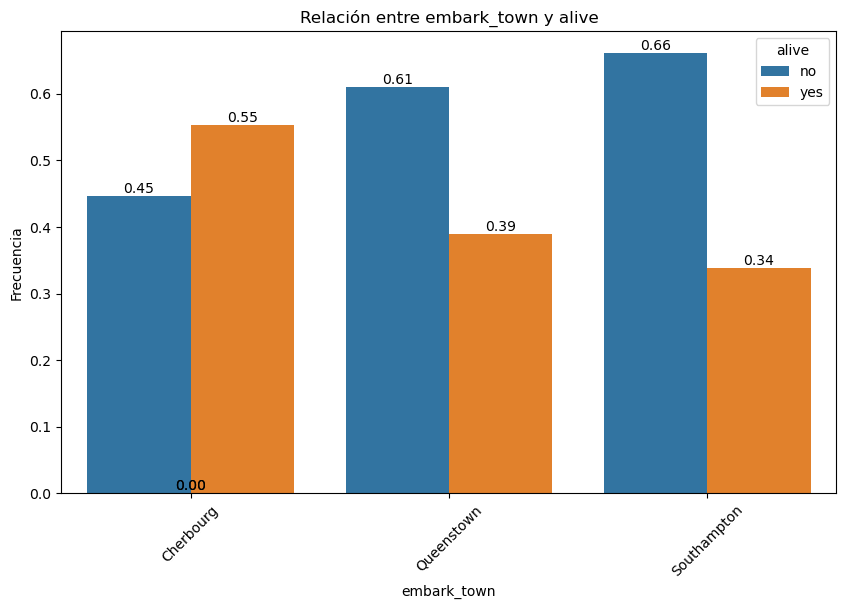

In [35]:
pinta_distribucion_categoricas(df_titanic[df_titanic.alive == 'yes'], ['embark_town'], mostrar_valores=True)
plot_categorical_relationship_fin(df_titanic, 'embark_town', 'alive', relative_freq=True, show_values=True)

*Al igual que en las clases, Southcampton cuenta con mayor número de supervivientes. Sin embargo, porcentualmente Cherbourg es la ciudad con mayor tasa de supervivencia (55%).*

*Relación estadítica:*

In [37]:
relacion_chi2(df_titanic, 'embark_town', 'alive')

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
------------------------------------------------
Existe relación estadística entre embark_town y alive.


4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

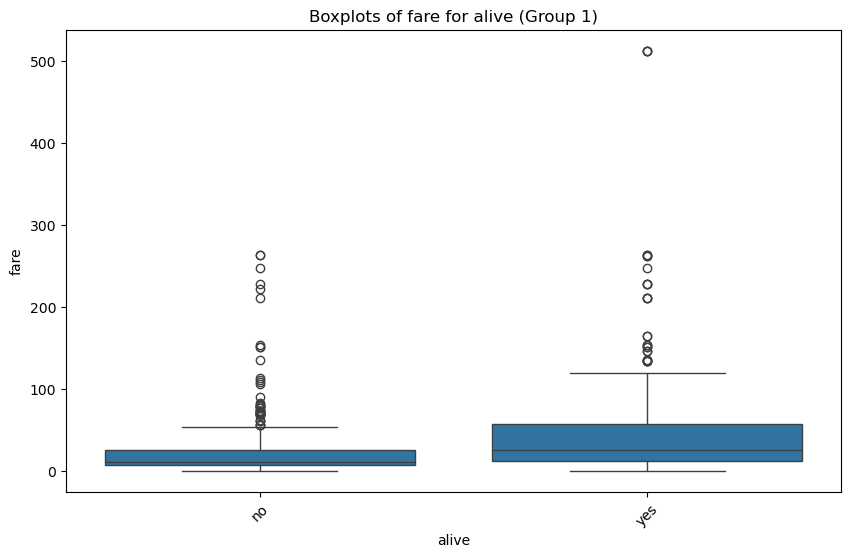

---------------------------
Media precio no supervivientes: 22.12
Mediana precio no supervivientes: 10.5
---------------------------
Media precio  supervivientes: 48.4
Mediana precio  supervivientes: 26.0


In [56]:
plot_grouped_boxplots(df_titanic, 'alive', 'fare')

for var in df_titanic.alive.unique():
    var2 = '' if var == 'yes' else 'no'
    print('---------------------------')
    print(f'Media precio {var2} supervivientes:', df_titanic.loc[df_titanic.alive == var, 'fare'].mean().round(2))
    print(f'Mediana precio {var2} supervivientes:', df_titanic.loc[df_titanic.alive == var, 'fare'].median().round(2))

*Los pasajeros con un billete más caro tienen una tasa de supervivencia mayor, esto puede verse en la distribución en dónde la caja de los supervivientes se ensancha hacia os precios superiores, y en la media, que aumenta con el precio elevado del billete de algunos supervivientes.*

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [59]:
df_titanic[df_titanic.fare == 0].sort_values('class')

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0,True
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0,True
806,male,39.000000,0.0,First,man,True,Southampton,no,True,0,True
815,male,33.173123,0.0,First,man,True,Southampton,no,True,0,True
822,male,38.000000,0.0,First,man,True,Southampton,no,True,0,True
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True
674,male,33.173123,0.0,Second,man,True,Southampton,no,True,0,True


In [60]:
df_titanic[df_titanic.fare == 0]['class'].value_counts()

class
Second    6
First     5
Third     4
Name: count, dtype: int64

*Todos son hombres varones que viajaban solos y embarcaron en Southampton. En total son 15, con una distribución de clase equitativa (véase celda anterior).*  
*Tan sólo sobrevivió uno de ellos, de tercera clase.*  
  
*Sólo se puede hipotetizar, pero seguramente correspondan a sirvientes y empleados (a los que se les pagó el pasaje) y/o polizones para la tercera clase.*

In [68]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max(), :]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,adult
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0,True
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1,True
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0,True


*Parece que los pasajes más caros (512,3292) fueron pagados por dos hombres y una mujer de primera clase y que sobrevivieron.*  
*Se podría hipotetizar de que los pasajeros sin miembros de familia eran empleados, quizas amigos, a los que se le abonó el pasaje, pero faltan datos.*

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

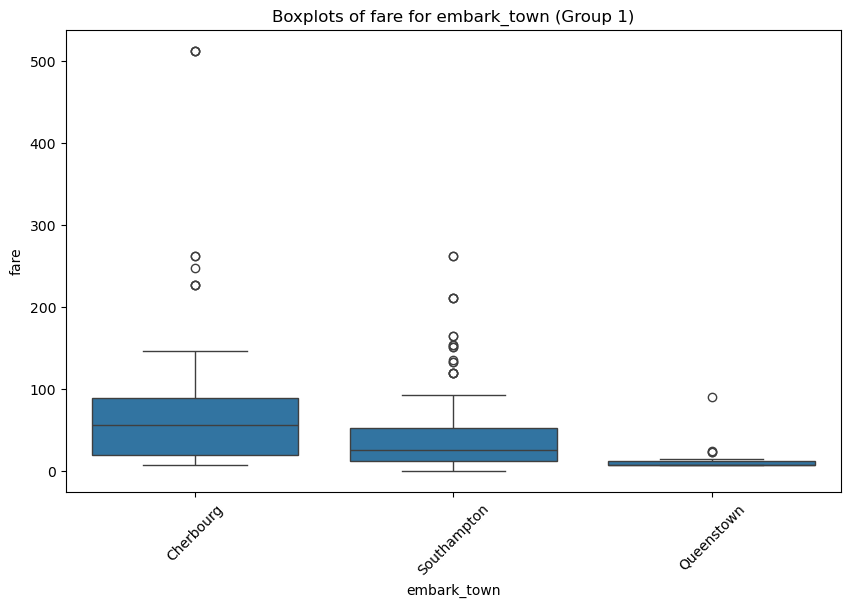

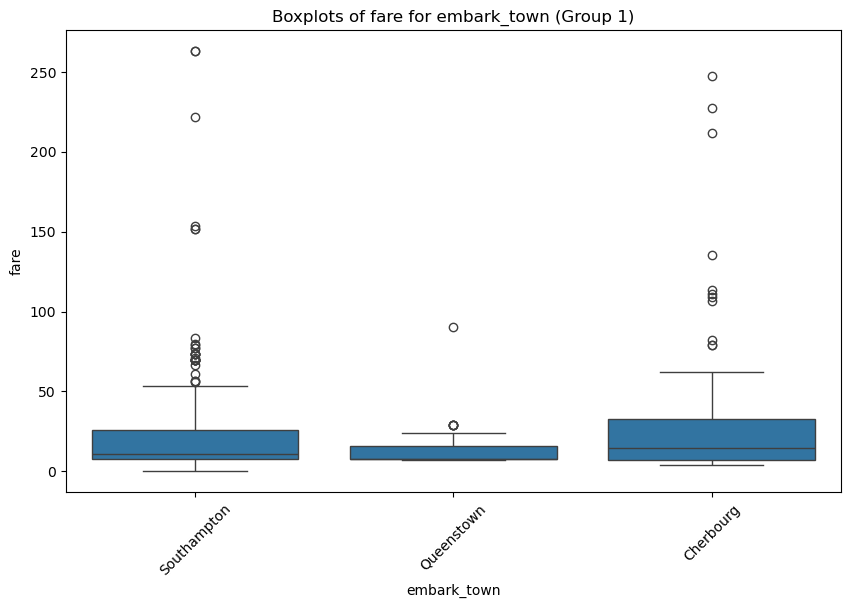

,no,yes
Southampton,"(20.74, 10.5)","(39.92, 26.0)"
Cherbourg,"(35.44, 14.46)","(79.72, 56.93)"
Queenstown,"(13.34, 7.75)","(13.18, 7.81)"


In [85]:
plot_grouped_boxplots(df_titanic[df_titanic.alive == 'yes'], 'embark_town', 'fare')
plot_grouped_boxplots(df_titanic[df_titanic.alive == 'no'], 'embark_town', 'fare')

lista_alive = []
for var in df_titanic.alive.unique():
    dict_alive = {}
    var_alive = 'supervivientes' if var == 'yes' else 'no supervivientes'
    df_alive = df_titanic[df_titanic.alive == var]
    for ciudad in df_titanic.embark_town.unique():
        dict_alive[ciudad] = (df_alive.loc[df_alive.embark_town == ciudad, 'fare'].mean().round(2),df_alive.loc[df_alive.embark_town == ciudad, 'fare'].median().round(2))
    lista_alive.append(dict_alive)
df_relacion_precio_ciudad = pd.DataFrame(lista_alive, index = df_titanic.alive.unique())
df_relacion_precio_ciudad.T

*Sí, aunque depende de la ciudad, aunque esto está relacionado con las clases dominantes en cada ciudad, (véase celda inferior).*  
*Por ejemplo,en Queenstown embarco una mayoría de tercera clase, y en la relación entre precio de pasaje y supervivencia vemos que la variación del precio entre los que sobrevivieron y los que no es nula, debido a que la gran mayoría pagó el mismo precio por el billete.*  
*En Southampton la distribución de clases es escalonada, aumentando con la clase (más pasajeros de tercera), y aquí ya vemos un alza en el precio de los billetes de los supervivientes, tanto en la media (teniendo en cuenta los outliers) como en la mediana.*
*Por último, en Cherbourg es donde tenemos un mayor contraste de clases, siendo la segunda clase la menos representada. Es aquí dónde vemos como el precio del billete entre los supervivientes se dispara frente al precio de los que no sobrevivieron, llegando a ser más del doble en el caso de la media y casi 4 veces mayor para la mediana.*

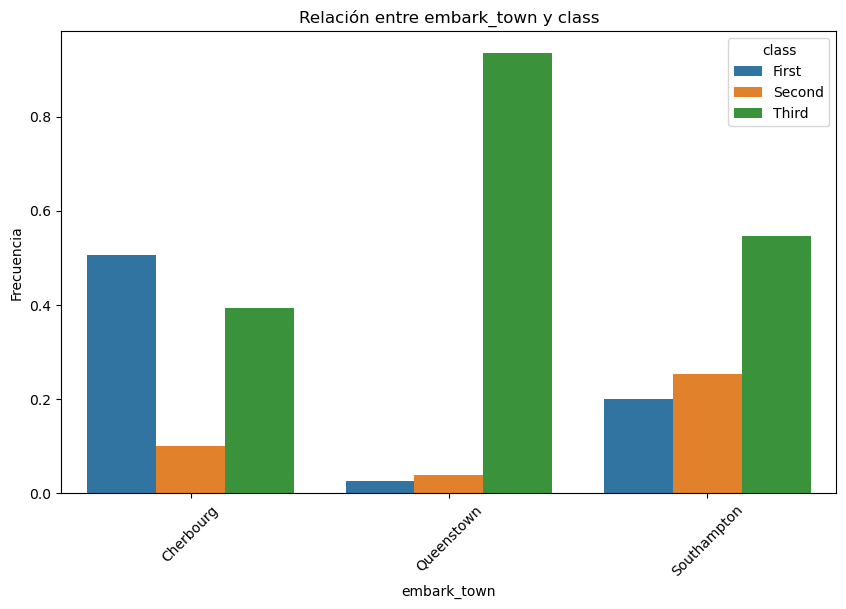

In [87]:
plot_categorical_relationship_fin(df_titanic,'embark_town','class', relative_freq=True)

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

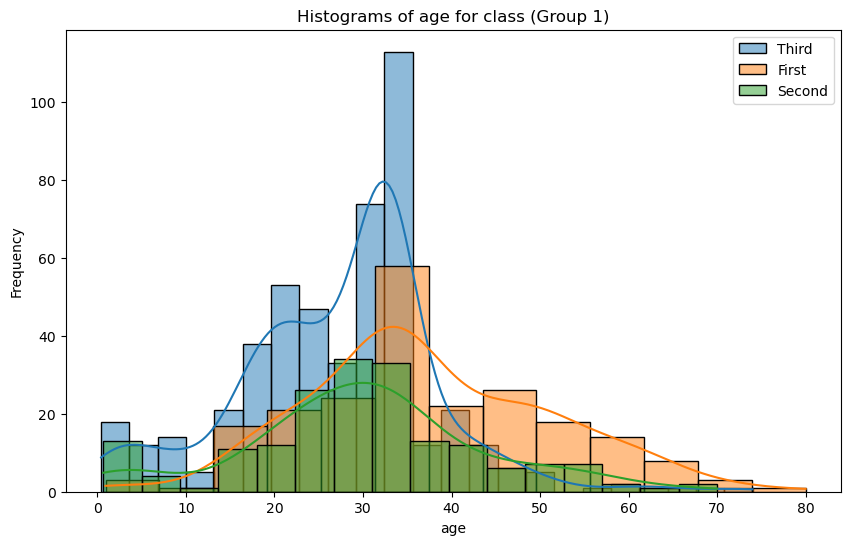

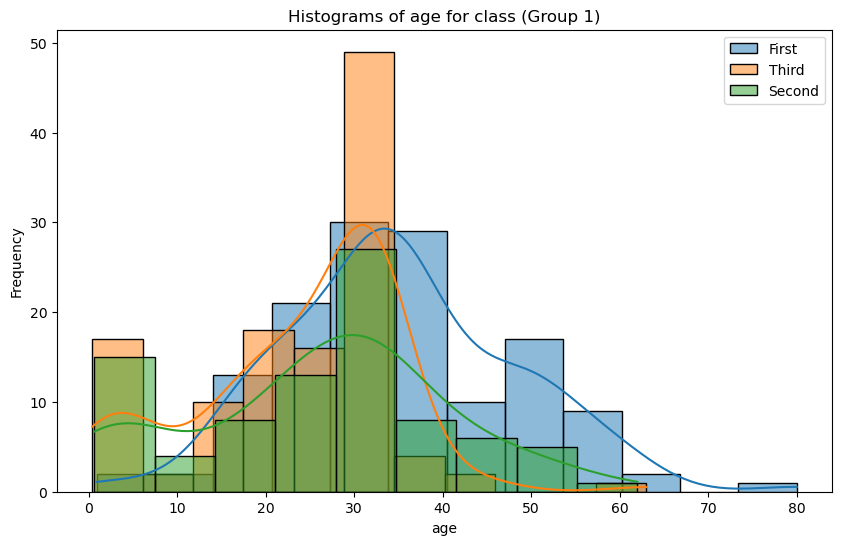

"\nfor var in df_titanic.alive.unique():\n    var_alive = 'supervivientes' if var == 'yes' else 'no supervivientes'\n    df_alive = df_titanic[df_titanic.alive == var]\n    print(f'Edad vs Clase para {var_alive}')\n    plot_grouped_histograms(df_alive, 'class', 'age', group_size=3)\n"

In [93]:
plot_grouped_histograms(df_titanic, 'class', 'age', group_size=3)
plot_grouped_histograms(df_titanic[df_titanic.alive=='yes'], 'class', 'age', group_size=3)
'''
for var in df_titanic.alive.unique():
    var_alive = 'supervivientes' if var == 'yes' else 'no supervivientes'
    df_alive = df_titanic[df_titanic.alive == var]
    print(f'Edad vs Clase para {var_alive}')
    plot_grouped_histograms(df_alive, 'class', 'age', group_size=3)
'''

*Atendiendo a las distribciones por edad de cada clase, podemos ver como para el total de pasajeros y pasajeros supervivientes, se mantienen las mismas relaciones de edad:*  
- *Para pasajeros de primera clase la distribución es más gaussiana.*
- *Para la segunda clase la distribución es similar pero con repunte en niños. Vemos que para los supervivientes hay un ligero desplazamiento a la izquierda.*
- *Para la tercera clase tenemos un mix entre normal Log (tendencia en edad media) y Gauss, con repunte en los niños. La distribución general se mantiene, no obstante, sí desaparece un repunte a los 20 años que se aprecia en la distribución total de pasajeros.*

Distribución total de pasajeros


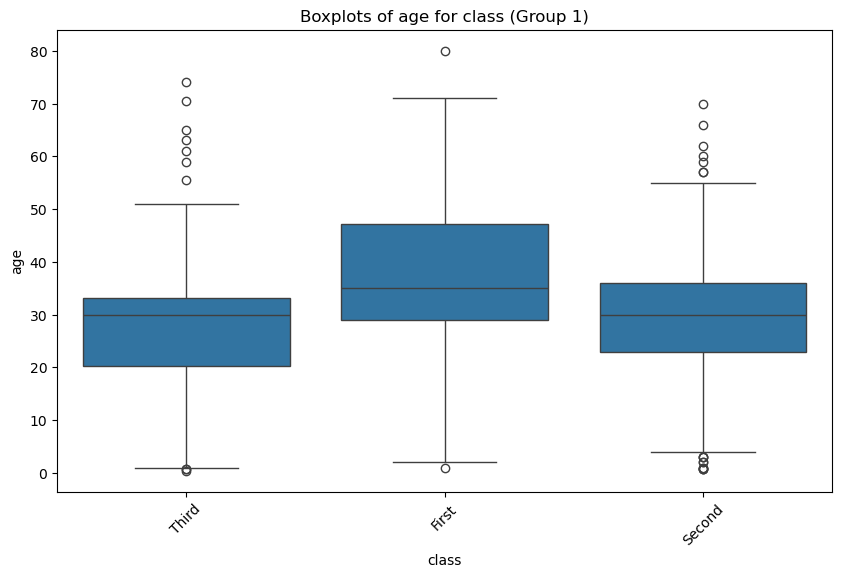

Distribución de pasajeros supervivientes


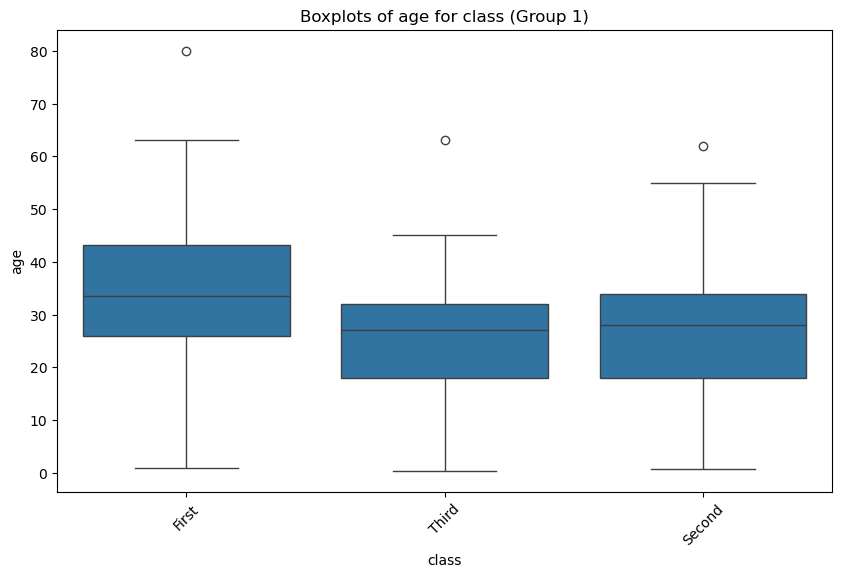

Distribución de pasajeros no supervivientes


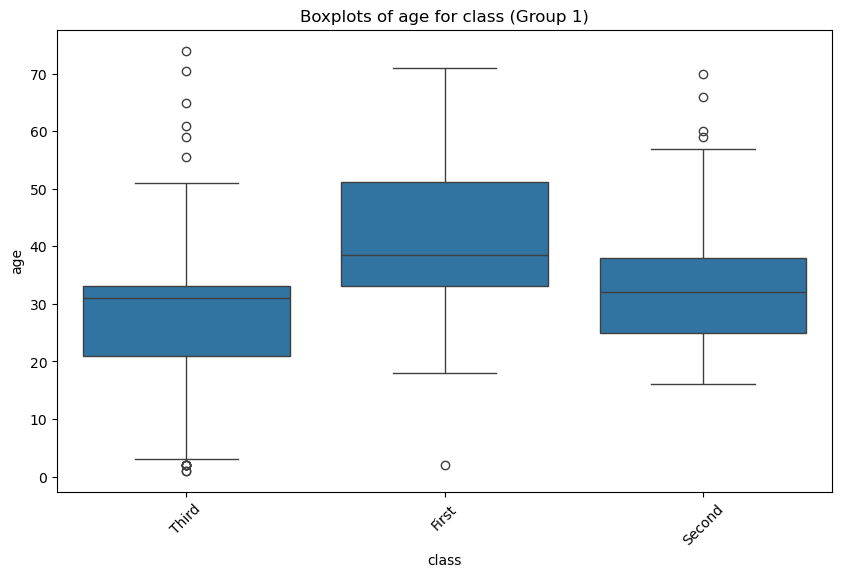

,no,yes,total
Third,"(28.32, 31.0)","(27.27, 30.0)","(27.27, 30.0)"
First,"(41.59, 38.5)","(37.48, 35.0)","(37.48, 35.0)"
Second,"(33.52, 32.0)","(30.06, 30.0)","(30.06, 30.0)"


In [102]:
# Analizando en detalle cada clase:

print('Distribución total de pasajeros')
plot_grouped_boxplots(df_titanic, 'class', 'age')
print('Distribución de pasajeros supervivientes')
plot_grouped_boxplots(df_titanic[df_titanic.alive == 'yes'], 'class', 'age')
print('Distribución de pasajeros no supervivientes')
plot_grouped_boxplots(df_titanic[df_titanic.alive == 'no'], 'class', 'age')

lista_alive = []
for var in df_titanic.alive.unique():
    dict_alive = {}
    var_alive = 'supervivientes' if var == 'yes' else 'no supervivientes'
    df_alive = df_titanic[df_titanic.alive == var]
    for ciudad in df_titanic['class'].unique():
        dict_alive[ciudad] = (df_alive.loc[df_alive['class'] == ciudad, 'age'].mean().round(2),df_alive.loc[df_alive['class'] == ciudad, 'age'].median().round(2))
    lista_alive.append(dict_alive)
df_alive = df_titanic
for ciudad in df_titanic['class'].unique():
    dict_alive[ciudad] = (df_alive.loc[df_alive['class'] == ciudad, 'age'].mean().round(2),df_alive.loc[df_alive['class'] == ciudad, 'age'].median().round(2))
lista_alive.append(dict_alive)

df_relacion_precio_ciudad = pd.DataFrame(lista_alive, index = list(df_titanic.alive.unique())+['total'])
df_relacion_precio_ciudad.T

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

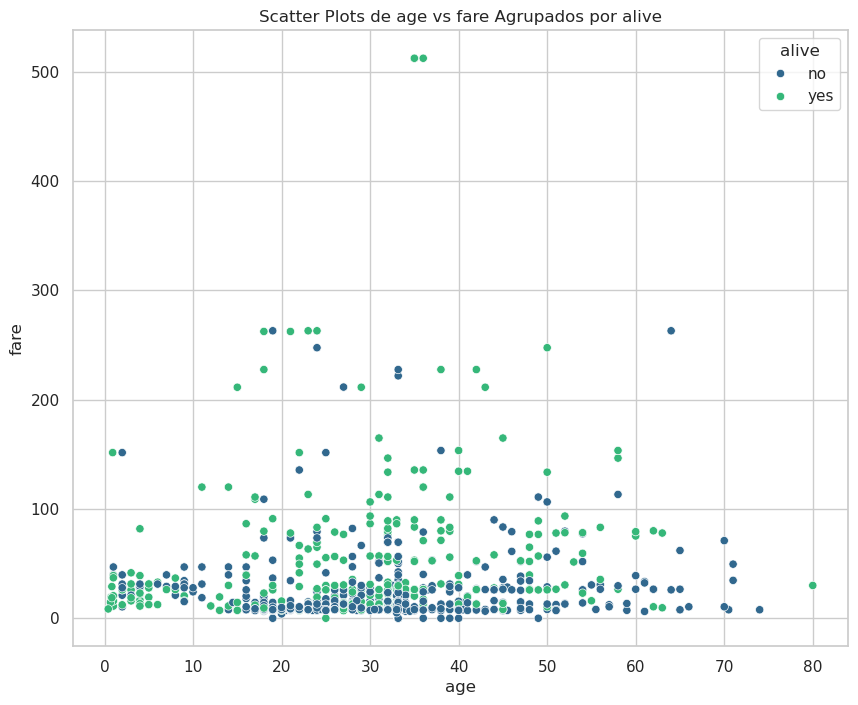

In [109]:
scatter_plots_agrupados(df_titanic, 'alive', 'age', 'fare')

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.